# World Happiness Prediction

## Imports

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import os

## Input & data cleanup

In [59]:
# Read in data
happiness_data = {}

for f in os.listdir('../data/WHI/'):
    year = f.split('.')[0]
    happiness_data[year] = pd.read_csv('../data/WHI/' + f)

# Unify column names
happiness_data['2017'].rename(columns={'Happiness.Score': 'Happiness Score'}, inplace=True)

happiness_data['2018'].rename(columns={'Country or region':'Country',
                        'Score':'Happiness Score'}, inplace=True)
happiness_data['2019'].rename(columns={'Country or region':'Country',
                        'Score':'Happiness Score'}, inplace=True)

happiness_data['2020'].rename(columns={'Country name': 'Country',
                        'Ladder score':'Happiness Score'}, inplace=True)
happiness_data['2021'].rename(columns={'Country name': 'Country',
                        'Ladder score':'Happiness Score'}, inplace=True)

happiness_data['2022'].rename(columns={'Happiness score': 'Happiness Score'}, inplace=True)

# Change number format for 2022 data to match other data
happiness_data['2022']['Happiness Score'] = happiness_data['2022']['Happiness Score'].str.replace(',', '.').astype(float)

# Remove every column except Country, Region and Happiness Score and add a column for the year
for df in happiness_data:
    happiness_data[df] = happiness_data[df][['Country', 'Happiness Score']]
    happiness_data[df]['Year'] = df

# Merge all years in one frame
happiness_df = pd.concat(happiness_data, ignore_index=True)

happiness_df

,Country,Happiness Score,Year
0,Switzerland,7.587,2015
1,Iceland,7.561,2015
2,Denmark,7.527,2015
3,Norway,7.522,2015
4,Canada,7.427,2015
...,...,...,...
1226,Benin,3.484,2016
1227,Afghanistan,3.360,2016
1228,Togo,3.303,2016
1229,Syria,3.069,2016


In [60]:
# Remove invalid countries
happiness_df.drop(happiness_df.loc[happiness_df['Country'] == 'xx'].index, inplace=True)

# Sort by year
happiness_df.sort_values(by=['Year'], inplace=True)

# Filter to only include the countries we want to predict
country_list = ['Germany', 'France', 'Italy', 'Spain', 'United Kingdom', 'United States']
happiness_df = happiness_df[happiness_df['Country'].isin(country_list)]

happiness_df.head()

,Country,Happiness Score,Year
0,Switzerland,7.587,2015
101,Greece,4.857,2015
102,Lebanon,4.839,2015
103,Hungary,4.800,2015
104,Honduras,4.788,2015


<Axes: xlabel='Year', ylabel='Happiness Score'>

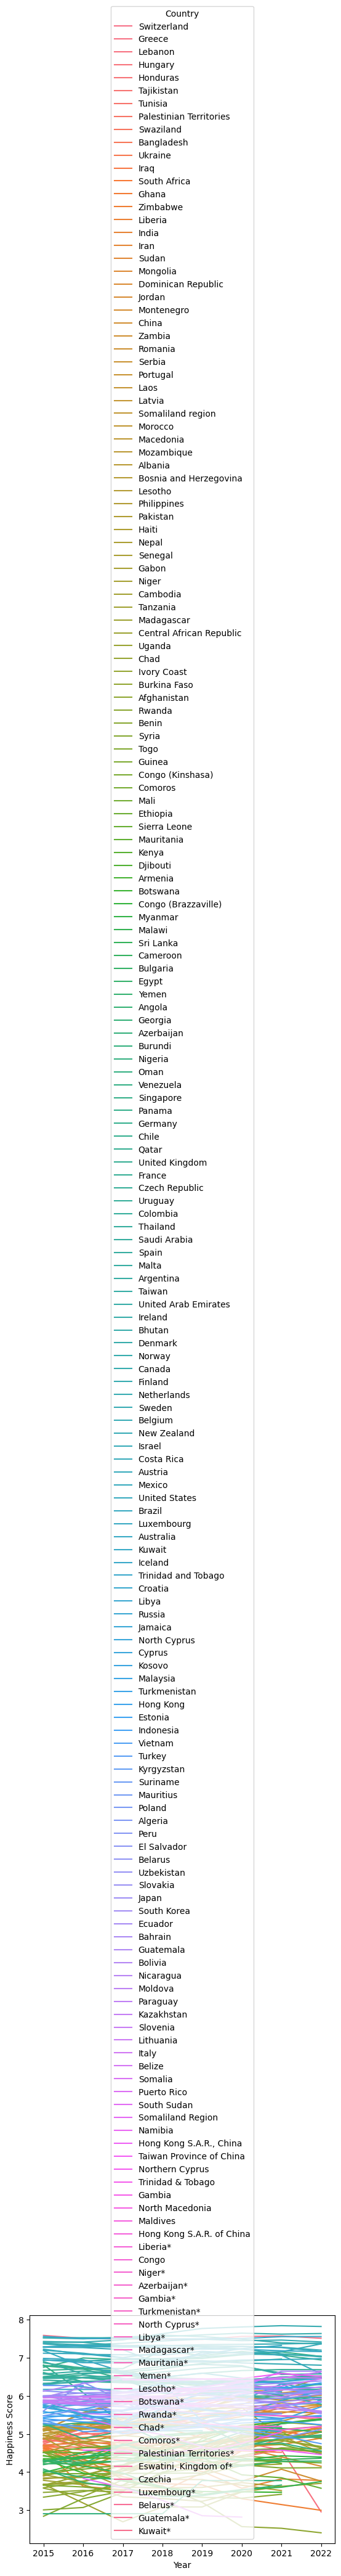

In [61]:
# Plot data for each country
sns.lineplot(data=happiness_df, x='Year', y='Happiness Score', hue='Country')

In [ ]:
#rng = np.random.RandomState(42) #Beispieldaten aus zwei Schwingungen
#x = 10 * rng.rand(200)

#def model(x, sigma=0.3):
#    fast_oscillation = np.sin(5 * x)
#    slow_oscillation = np.sin(0.5 * x)
#    noise = sigma * rng.randn(len(x))
#
#    return slow_oscillation + fast_oscillation + noise

#y = model(x)
#plt.errorbar(x, y, 0.3, fmt='o'); # Konfidenzintervall

## Data analysis with Random Forest Regressor

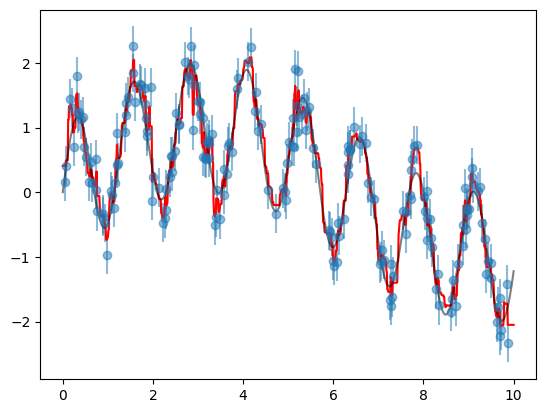

In [3]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(200) # Number of decision trees
forest.fit(x[:, None], y)

xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma=0)

plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);